In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import datetime
from pprint import pprint
%matplotlib inline

In [5]:
# build mementos on FP5program online

max_year = '2002'
min_year = '1998'

timemaps_structure = {}

for timemap_file in os.listdir('./mementos_all_with_url'):           
    with open('./mementos_all_with_url/' + timemap_file) as timemap:    
        timemap_json = json.load(timemap)                            
        original_uri = timemap_json['original_uri']        
        if timemap_json.get('mementos',0) != 0:
            all_mementos = timemap_json['mementos']['list']         
            accepted_mementos = []
            for memento in all_mementos:                
                date_string = memento['datetime']                
                date = datetime.datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%S%fZ")
                if (int(date.year) >= int(min_year) and int(date.year) <= int(max_year)):
                    accepted_mementos.append(memento)        
            timemaps_structure[original_uri] = accepted_mementos

In [6]:
iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:        
        count += 1        
print "Number of URIs without a version archived: %s" % count            

Number of URIs without a version archived: 1661


In [7]:
# Mementos frequency distribution
timemaps_frequency = {}

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        timemaps_frequency[uri] = len(mementos)
#print "Number of URIs without any version archived: %s" % count 

In [8]:
from urlparse import urlparse
import re

domains = []

iterator = timemaps_structure.iteritems()
domains_not_archived = []
domains_archived = []
for uri,mementos in iterator:    
    if mementos == []:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_not_archived.append(url_parsed[len(url_parsed) - 1])
    else:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_archived.append(url_parsed[len(url_parsed) - 1])
#print "Number of URIs without any version archived: %s" % count 

In [9]:
from collections import Counter
counter_not_archived = Counter(domains_not_archived)
counter_archived = Counter(domains_archived)

In [10]:
counter_not_archived

Counter({u'165': 1,
         u'222': 1,
         u'32': 1,
         u'at': 2,
         u'be': 7,
         u'bg': 2,
         u'bz': 1,
         u'cc': 1,
         u'ch': 3,
         u'com': 40,
         u'cx': 1,
         u'cz': 2,
         u'de': 40,
         u'dk': 6,
         u'edu': 1,
         u'es': 19,
         u'eu': 2,
         u'fi': 5,
         u'fr': 20,
         u'gr': 13,
         u'gr:8080': 1,
         u'hu': 1,
         u'ie': 2,
         u'info': 12,
         u'int': 1,
         u'is': 1,
         u'it': 25,
         u'net': 17,
         u'nl': 10,
         u'no': 5,
         u'org': 67,
         u'pl': 4,
         u'pt': 2,
         u'se': 13,
         u'si': 1,
         u'sk': 1,
         u'uk': 26})

In [11]:
counter_archived

Counter({u'10': 1,
         u'174': 1,
         u'DE': 1,
         u'IE': 1,
         u'IT': 1,
         u'at': 34,
         u'be': 29,
         u'bg': 9,
         u'biz': 2,
         u'cc': 1,
         u'ch': 10,
         u'cl': 1,
         u'com': 206,
         u'cy': 2,
         u'cz': 14,
         u'de': 155,
         u'dk': 27,
         u'edu': 3,
         u'ee': 2,
         u'es': 75,
         u'fi': 19,
         u'fr': 102,
         u'gr': 68,
         u'hu': 14,
         u'ie': 19,
         u'il': 10,
         u'info': 10,
         u'int': 5,
         u'is': 1,
         u'it': 138,
         u'lt': 1,
         u'lu': 4,
         u'lv': 4,
         u'mu': 1,
         u'net': 77,
         u'nl': 44,
         u'no': 19,
         u'nu': 3,
         u'org': 336,
         u'pl': 25,
         u'pt': 18,
         u'ro': 4,
         u'ru': 1,
         u'se': 23,
         u'si': 4,
         u'sk': 3,
         u'tr': 1,
         u'tv': 1,
         u'uk': 129,
         u'ws': 2})

# Web Archives Distribution

In [15]:
# Mementos frequency distribution
list_mementos = []

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        for m in mementos:
            list_mementos.append(m)
#print "Number of URIs without any version archived: %s" % count 

In [16]:
web_archives = []
for memento in list_mementos:
    web_archives.append(memento['uri'].split('/')[2])

web_archives_distribution = Counter(web_archives)    

In [19]:
web_archives_distribution

Counter({u'arquivo.pt': 138,
         u'wayback.archive-it.org': 3,
         u'wayback.vefsafn.is': 7,
         u'web.archive.bibalex.org:80': 6061,
         u'web.archive.org': 17533,
         u'webarchive.loc.gov': 97,
         u'webarchive.nationalarchives.gov.uk': 45})

In [20]:
len(list_mementos)

23884

([<matplotlib.axis.XTick at 0x7f30949a8910>,
 <a list of 7 Text xticklabel objects>)

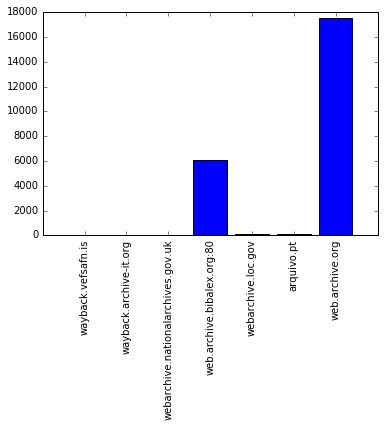

In [21]:
plt.bar(range(len(web_archives_distribution)), web_archives_distribution.values(), align='center',)
plt.xticks(range(len(web_archives_distribution)), web_archives_distribution.keys(),  rotation='vertical')

In [22]:
9032/9961.

0.9067362714586888

# FP5 Archvived versions location distribution

In [24]:
iterator = timemaps_structure.iteritems()
count = 0
rows_list = []
for uri,mementos in iterator:     
    if mementos != []:        
        dictrow = {}    
        dictrow['URI-O'] = uri
        for m in mementos:        
            dictrow[m['uri'].split('/')[2]] = 1
        rows_list.append(dictrow)

In [25]:
df = pd.DataFrame(rows_list)
df.count()

URI-O                                 1661
arquivo.pt                              15
wayback.archive-it.org                   1
wayback.vefsafn.is                       1
web.archive.bibalex.org:80             613
web.archive.org                       1655
webarchive.loc.gov                      49
webarchive.nationalarchives.gov.uk       6
dtype: int64

In [26]:
df.count() / 2717 * 100

URI-O                                 61.133603
arquivo.pt                             0.552079
wayback.archive-it.org                 0.036805
wayback.vefsafn.is                     0.036805
web.archive.bibalex.org:80            22.561649
web.archive.org                       60.912771
webarchive.loc.gov                     1.803460
webarchive.nationalarchives.gov.uk     0.220832
dtype: float64